# Basic Assumptions of Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
house = pd.read_csv('House_Sales.csv')
house = house.drop(['Unnamed: 0'], axis=1)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,6
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11


In [3]:
y = house.iloc[:, 0]
x = house.iloc[:, 1:]

In [4]:
x_c = sm.add_constant(x)

In [5]:
reg = sm.OLS(y, x_c).fit()

In [6]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2939.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        10:43:50   Log-Likelihood:            -2.9660e+05
No. Observations:               21613   AIC:                         5.932e+05
Df Residuals:                   21599   BIC:                         5.933e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.255e+05   1.75e+04    -52.815

## 1. Multicollinearity

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [15]:
vif_factors = [vif(x.values, i) for i in range(0, x.shape[1])]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [16]:
vif_report = pd.DataFrame({"Variable": x.columns, 'VIF Factor': vif_factors})
vif_report

,Variable,VIF Factor
0,bedrooms,21.189154
1,bathrooms,28.558762
2,sqft_living,inf
3,sqft_lot,2.365493
4,floors,16.092498
5,waterfront,1.207278
6,view,1.499986
7,condition,28.880160
8,grade,68.849787
9,sqft_above,inf


In [30]:
x1 = x.drop(['sqft_above', 'sqft_basement', 'grade', 'sqft_living15', 'sqft_lot'], axis=1)

KeyError: "['sqft_above' 'sqft_basement' 'grade' 'sqft_lot'] not found in axis"

In [21]:
vif_factors = [vif(x1.values, i) for i in range(0, x1.shape[1])]

In [22]:
vif_report = pd.DataFrame({"Variable": x1.columns, 'VIF Factor': vif_factors})
vif_report

,Variable,VIF Factor
0,bedrooms,19.525915
1,bathrooms,21.354503
2,floors,10.485658
3,waterfront,1.204885
4,view,1.425744
5,condition,20.843185
6,sqft_living15,14.680749
7,sqft_lot15,1.271084
8,old,5.245103


In [25]:
x = x1

In [26]:
x_c = sm.add_constant(x)

In [27]:
reg = sm.OLS(y, x_c).fit()

In [28]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     2514.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        11:10:58   Log-Likelihood:            -2.9986e+05
No. Observations:               21613   AIC:                         5.997e+05
Df Residuals:                   21603   BIC:                         5.998e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.277e+05   1.37e+04    -38.424

## 2. Linearity of Errors

In [32]:
residual = reg.resid

In [33]:
pred_y = reg.predict()

In [34]:
import seaborn as sns

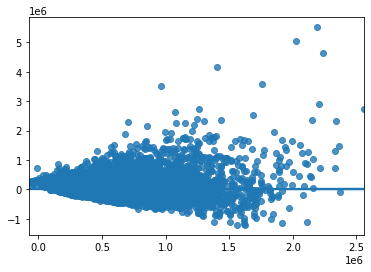

In [35]:
sns.regplot(x=pred_y, y=residual)
plt.show()

In [36]:
stud_res = reg.outlier_test()

In [37]:
stud_res

,student_resid,unadj_p,bonf(p)
0,0.044941,0.964155,1.0
1,0.331327,0.740401,1.0
2,-1.530686,0.125862,1.0
3,0.141119,0.887777,1.0
4,0.498713,0.617987,1.0
...,...,...,...
21608,-0.436705,0.662330,1.0
21609,-0.183061,0.854752,1.0
21610,1.543989,0.122606,1.0
21611,0.000008,0.999994,1.0


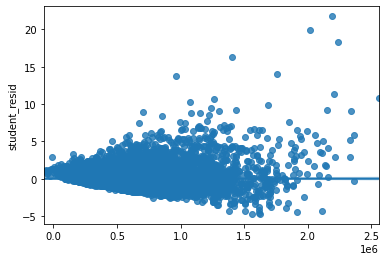

In [38]:
sns.regplot(x=pred_y, y=stud_res['student_resid'])
plt.show()

## 3. Homoscedasticity

In [39]:
bp_test = sm.stats.het_breuschpagan(residual, x)

In [41]:
labels = ['Test Statistics', 'p-value', 'f-value', 'f p-value']

In [42]:
dict(zip(labels, bp_test))

{'Test Statistics': 1992.959914377993,
 'p-value': 0.0,
 'f-value': 243.8317930846094,
 'f p-value': 0.0}

In [43]:
reg = sm.OLS(y, x_c).fit(cov_type = 'HC3')

In [44]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     692.2
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        11:43:56   Log-Likelihood:            -2.9986e+05
No. Observations:               21613   AIC:                         5.997e+05
Df Residuals:                   21603   BIC:                         5.998e+05
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.277e+05   1.77e+04    -29.795

## 4. Independence of Errors

In [45]:
reg = sm.OLS(y, x_c).fit()

In [46]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     2514.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        11:46:38   Log-Likelihood:            -2.9986e+05
No. Observations:               21613   AIC:                         5.997e+05
Df Residuals:                   21603   BIC:                         5.998e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.277e+05   1.37e+04    -38.424

## 5. Normality of Errors

In [47]:
residual = reg.resid

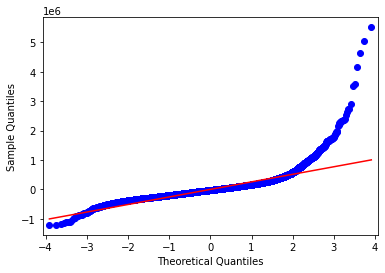

In [48]:
sm.ProbPlot(residual).qqplot(line='s')
plt.show()

In [49]:
from scipy import stats

In [50]:
stats.kstest(residual, 'norm')

KstestResult(statistic=0.5489751538425948, pvalue=0.0)

In [51]:
stats.shapiro(residual)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8085395693778992, pvalue=0.0)

In [52]:
stats.jarque_bera(residual)

Jarque_beraResult(statistic=1487400.4029496496, pvalue=0.0)

## *** Variable Transformation

In [ ]:
sns.regplot(x=pred.)